### IDs:
Insert yours IDs to the cell below

ID #1: 312146343

ID #2: 806761


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
#import plotly.express as px
import random
import seaborn as sns
import pandas as pd
import math
from scipy import stats
sns.set()

## Read the following instructions carefully:

1. This jupyter notebook contains all the step by step instructions needed for this exercise.
1. You are free to add cells.
1. Write your functions and your answers in this jupyter notebook only.
1. Answers to theoretical questions should be written in **markdown cells (with $\LaTeX$ support)**.
1. Submit this jupyter notebook only using your ID as a filename. Not to use ZIP or RAR. For example, your Moodle submission file name should look like this (two id numbers): `123456789_987654321.ipynb`.

### Question 1 - Defective products

In a manufacturing pipeline products are 3% defective. We are interested in examining a defective product to see what goes wrong on the belt. We need to ask the facility manager to send us a set of independent samples for examination.

#### 1.A

How many independent samples should we ask for in order to have a 85% probability of having at least one defective product in the batch sent? You should write a function.

**Define X is the number of defectve product in the batch**  
**Define n is the number of independent samples we should ask for**
$$P(X\geq1)=85\%$$
$$P(X\geq1)=1-P(X=0)=85\%$$
$$P(X=0)=1-85\%=(1-3\%)^n$$

In [2]:
def num_samples(p, target_prob):
    n = 1
    while ((1-p)**n) >= (1-target_prob):
        n = n + 1
    return n

In [3]:
num_samples(p = 0.03, target_prob =0.85)

63

Or use scipy:

In [4]:
def get_several_defective_scipy(wanted_prob_defective ,prob_sample, number_of_defects = 1):
    """
    Percent point function (inverse of `cdf`) at q of the given RV.
    """
    return stats.nbinom.ppf(q=wanted_prob_defective, n=number_of_defects, p=prob_sample, loc=number_of_defects) 

In [5]:
get_several_defective_scipy(0.85, 0.03)

63.0

#### 1.B
Answer this part again with the following changes: products are 4% defective and we want a 95% probability of at least one defective product in the batch.

In [6]:
num_samples(p = 0.04, target_prob =0.95)

74

Or use scipy:

In [7]:
get_several_defective_scipy(0.95,0.04)

74.0

#### 1.C 

Consider the following cases and calculate how many independent samples are required: 

1. Products are 10% defective and we want a 90% probability of at least 5 defective products in the batch.
1. Products are 30% defective and we want a 90% probability of at least 15 defective products in the batch.

Explain the difference between the two results. You should use mathematical reasoning based on the properties of distributions you saw in class and visualizations in your answer.

**Define X is the number of defectve product in the batch**  
**Define n is the number of independent samples we should ask for**  
**Define k is the required number of defectve product we want**  

$$X\sim B(n, p)$$  

1. 10% defective and we want a 90% probability of at least 5 defective products
$$X\sim B(n, 0.1)$$  
$$P(X\geq5)=90\%$$  
$$P(X\geq5)=1-P(X=0)-P(X=1)-P(X=2)-P(X=3)-P(X=4)=90\%$$  
$$P(X\geq5)=1-CDF(4)=90\%$$  

In [8]:
def num_samples_2(p, target_prob, k):
    n = 1
    rv = stats.binom(n, p)
    while 1 - rv.cdf(k-1) < target_prob:
        n = n + 1
        rv = stats.binom(n, p)
    return n

In [9]:
num_samples_2(p = 0.1, target_prob = 0.90, k = 5)

78

2. 30% defective and we want a 90% probability of at least 15 defective products
$$X\sim B(n, 0.3)$$  
$$P(X\geq15)=90\%$$  
$$P(X\geq15)=1-CDF(14)=90\%$$  

In [10]:
num_samples_2(p = 0.3, target_prob = 0.90, k = 15)

64

Or use scipy:

In [11]:
get_several_defective_scipy(0.9, 0.1, 5), get_several_defective_scipy(0.9, 0.3, 15)

(78.0, 64.0)

Explain the difference between the two results

### Question 2 - Rent distributions in Randomistan

The state of Randomistan conducted a survey to study the distribution of rent paid in two neighboring towns, Stochastic Heights and Random Grove, to be denoted SH and RG.<br> 

Here are some findings of the survey:
* The population of SH and RG is 16,000 and 22,000 respectively. <br>
* The mean rent in SH and RG is 6300RCU and 4200RCU respectively.
* The median rent is 4600RCU in both towns.
* The IQR of the rent is smaller in SH than in RG.

All data generated in this question needs to be consistent with these findings.

#### 2.A
Draw histograms that describe 2 different scenarii of possible distributions of rent in the two towns.Your histograms should:<br>
* Use bins of 100RCU each.
* Have at least 10 non zero bins.

In [12]:
def ganrate_2_dists(medianA, meanA, num_samplesA, max_rangeA, medianB, meanB, num_samplesB, max_rangeB):

    def find_dist_mean(current_mean, desired_median):
        return int(2*desired_median-current_mean)

    def create_dist_with_mean(num_samples, mean, eps):
        res = []
        for idx in range(num_samples//2):
            random_number = random.randint(mean,mean+eps)
            res.append(random_number)
            res.append(mean - (random_number - mean))
        return list(res)

    def create_random_dist(num_samples, start, end):
        return [random.randint(start,end) for i in range(num_samples)]

    def get_median_arr(num_samples, median):
        if num_samples%2 == 0:
            half_num_samples = num_samples//2 - 1
            median_arr = [median, median, median]
        else:
            half_num_samples = num_samples//2
            median_arr = [median]
        return median_arr, half_num_samples
    
    def ganrate_dist(median, mean, num_samples,max_range):
        median_arr, half_num_samples = get_median_arr(num_samples, median)
        if median<=mean:
            bottom_half = create_random_dist(half_num_samples, 0, median-1)
            top_half = create_dist_with_mean(num_samples = half_num_samples, mean = find_dist_mean(np.mean(bottom_half), mean+1), eps = (mean-median))
        else:
            top_half = create_random_dist(half_num_samples, median+1, max_range)
            bottom_half = create_dist_with_mean(num_samples = half_num_samples, mean = find_dist_mean(np.mean(top_half), mean), eps = (median-mean))
        return np.array(bottom_half + median_arr + top_half)
    
    return ganrate_dist(medianA, meanA, num_samplesA, max_rangeA), ganrate_dist(medianB, meanB, num_samplesB, max_rangeB)
    
def df_2_dist(dist_a, dist_b, name_a, name_b):
    df = pd.DataFrame()
    df[name_a] = pd.Series({'Size': round(len(dist_a)), 'Mean': round(np.mean(dist_a)), 'Median': round(np.median(dist_a)), 'IQR': round(stats.iqr(dist_a)), 'Variance': round(np.var(dist_a))})
    df[name_b] = pd.Series({'Size': round(len(dist_b)), 'Mean': round(np.mean(dist_b)), 'Median': round(np.median(dist_b)), 'IQR': round(stats.iqr(dist_b)), 'Variance': round(np.var(dist_b))})
    return df

In [13]:
%%time
rent_sh, rent_rg = ganrate_2_dists(medianA = 4600, meanA = 6300, num_samplesA = 16000, max_rangeA = 8000, medianB = 4600, meanB = 4200, num_samplesB = 22000, max_rangeB = 12000)

CPU times: user 38.6 ms, sys: 2.78 ms, total: 41.4 ms
Wall time: 39 ms


In [14]:
df_2_dist(rent_sh, rent_rg, 'Stochastic Heights (Rent)', 'Random Grove (Rent)')

,Stochastic Heights (Rent),Random Grove (Rent)
Size,16000,22000
Mean,6300,4200
Median,4600,4600
IQR,7988,8227
Variance,17301588,19270511


<AxesSubplot: ylabel='Count'>

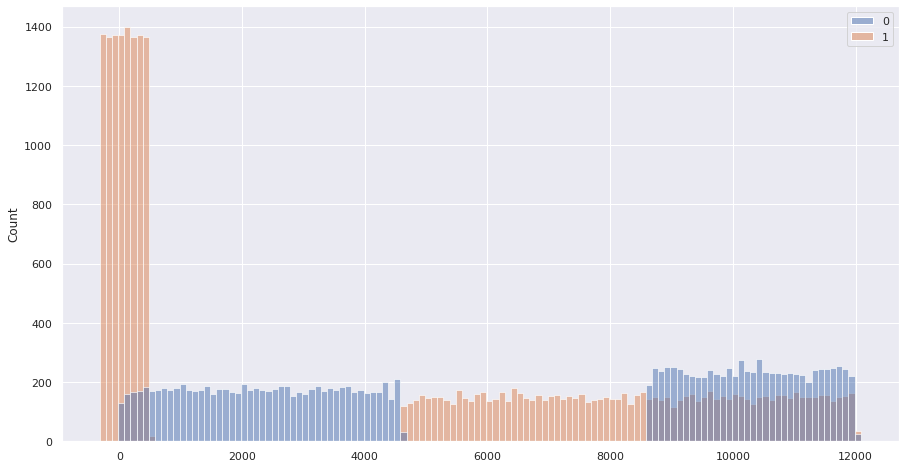

In [15]:
plt.figure(figsize=(15,8))
sns.histplot(data=[rent_sh, rent_rg], binwidth=100)

#### 2.B
Draw a histogram of a third scenario with the same properties. <br>
In addition, in this scenario the rent in SH should have a higher variance than the rent in RG.

In [16]:
def increases_variance_without_changing_the_median_or_mean(dist):
    q25 = np.quantile(dist, 0.25)
    q75 = np.quantile(dist, 0.75)

    dist = np.sort(dist).copy()
    for i in range(len(dist)):
        if dist[i] < q25 and dist[len(dist)-i-1] > q75:
            val = dist[i]
            dist[i] -=val
            dist[len(dist)-i-1] += val
    return dist

In [17]:
rent_sh_higher_var = increases_variance_without_changing_the_median_or_mean(rent_sh)

In [18]:
df_2_dist(rent_sh_higher_var, rent_sh, 'Stochastic Heights High Var', 'Random Grove')

,Stochastic Heights High Var,Random Grove
Size,16000,16000
Mean,6300,6300
Median,4600,4600
IQR,8989,7988
Variance,23606212,17301588


<AxesSubplot: ylabel='Count'>

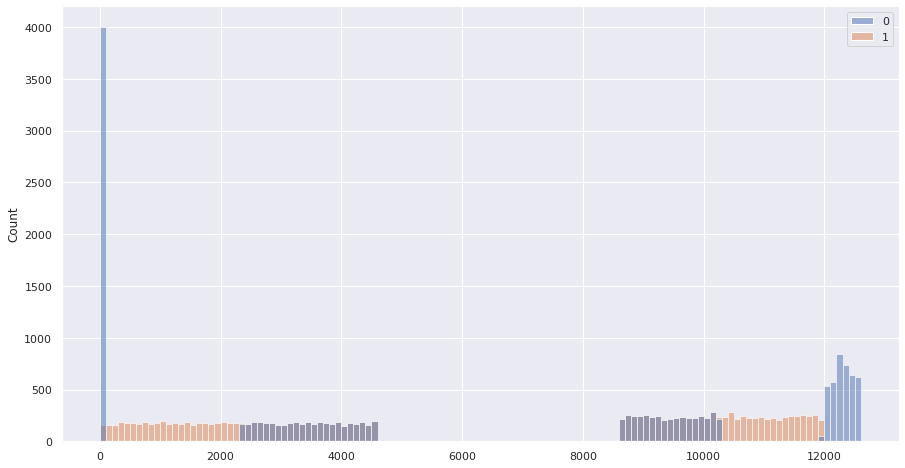

In [19]:
plt.figure(figsize=(15,8))
sns.histplot(data=[rent_sh_higher_var, rent_sh], binwidth=100, )

The survey also examined the per household income (PHI) in these two places.<br>

It found that:<br>
* The mean of PHI in SH is 12500 and in RG is 8500.
* The median is 12000 in SH and 8000 in RG.
* The covariance of the rent and the PHI was observed to be as in the formula below with $\alpha=97\%$ and $\alpha=89\%$ in SH and in RG respectively.<br><br>
$$Cov(rent, PHI) = \alpha * \sqrt{Var(rent)} * \sqrt{Var(PHI)}$$

#### 2.C
Produce rent and PHI data for the two cities, that is consistent with these findings. The covariances in your data can deviate by up to 1% from the numbers given $\alpha$.

In [20]:
%%time
sh_phi, rg_phi = ganrate_2_dists(medianA = 12000, meanA = 12500, num_samplesA = 16000, max_rangeA = 8000, medianB = 8000, meanB = 8500, num_samplesB = 22000, max_rangeB = 12000)

CPU times: user 37 ms, sys: 2.98 ms, total: 39.9 ms
Wall time: 38.7 ms


In [21]:
df_2_dist(sh_phi, rg_phi, 'Stochastic Heights (PHI)', 'Random Grove (PHI)')

,Stochastic Heights (PHI),Random Grove (PHI)
Size,16000,22000
Mean,12500,8500
Median,12000,8000
IQR,13015,8973
Variance,48368859,22965563


<AxesSubplot: ylabel='Count'>

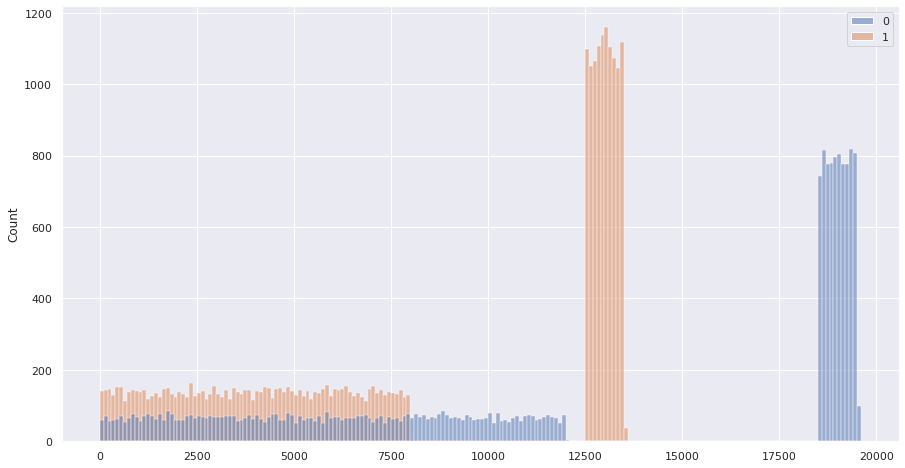

In [22]:
plt.figure(figsize=(15,8))
sns.histplot(data=[sh_phi, rg_phi], binwidth=100)

Calculating the Expected Cov(rent,PHI) base on the given a:

In [23]:
exp_cov_sh = 0.97 * np.var(sh_phi)**0.5 * np.var(rent_sh)**0.5
exp_cov_rg = 0.89 * np.var(rg_phi)**0.5 * np.var(rent_rg)**0.5
exp_cov_rg, exp_cov_sh

(18722988.25936732, 28060644.050506834)

The "real" cov based on the distributions

In [24]:
cov_sh = np.cov(rent_sh,sh_phi)[0,1]
cov_rg = np.cov(rent_rg,rg_phi)[0,1]
#the ratio shouldent be greater / smaller then 1%
cov_rg/exp_cov_rg , cov_sh/exp_cov_sh

(0.9899087042318987, 0.9318313386115206)

#### 2.D
Produce two heatmaps that describe these two bivariate joint distributions. Make sure you carefully consider the selected binning resolution.

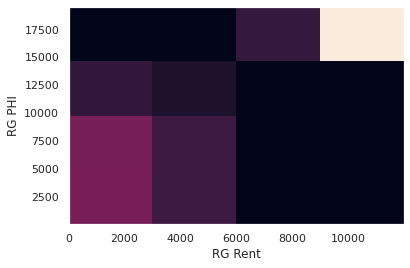

In [25]:
plt.hist2d(x=rent_sh,y=sh_phi,bins=4)
plt.xlabel('RG Rent')
plt.ylabel('RG PHI')
plt.show()

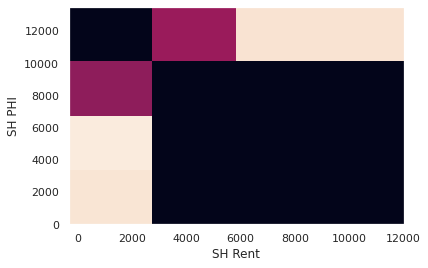

In [26]:
plt.hist2d(x=rent_rg,y=rg_phi,bins=4)
plt.xlabel('SH Rent')
plt.ylabel('SH PHI')
plt.show()

### Question 3 - Multinomial Distributions

1. Let $X \sim Multinomial(n,\vec{p})$ be a multinomial random variable where $n=20$ and $\vec{p} = (0.2,  0.1,  0.1,  0.1,  0.2,  0.3)$. Note that X is a vector of counts.


2. Let $Y = X_2 + X_3 + X_4$ be a random variable.


3. Create $k=100$ experiments where $X$ is sampled using Python. Calculate the empirical centralized third moment of $Y$ based on your $k$ experiments.


4. Compare your result to the calculation in class for the centralized third moment of the **binomial** distribution and explain your observation.

In [27]:
np.random.seed(10)
X = np.random.multinomial(20, [0.2, 0.1, 0.1, 0.1, 0.2, 0.3], size=100)

In [28]:
Y = X[:,1:4].sum(axis=1)

$$\gamma3=E[(X-E(X)^3)]$$

In [29]:
Y3 = ((Y-Y.mean())**3).mean()
#stats.skew(Y)*Y.std()**3 #--another way to calculate
Y3

1.0573020000000024

4. In class, we have $\gamma3=np(1-p)(1-2p)=20\times(1-0.3)(1-2\times0.3)=1.68$  
If we increase k value, we will have more accurate central third moment of Y

In [30]:
np.random.seed(100)
X = np.random.multinomial(20, [0.2, 0.1, 0.1, 0.1, 0.2, 0.3], size=1000000)
Y = X[:,1:4].sum(axis=1)
Y3 = ((Y-Y.mean())**3).mean()
Y3

1.6828045638832854

We can see the central third moment of binomial distribution $T\sim B(20, 0.3)$ is equal to the central third moment of $Y$.  
$Y$ is the sum of parts of binomial distribution from multinomial RV $X$. $Xi$ and $Xj$ are independent, so we can add their central third moment.  
From Wiki: Central moment has additivity property for random variables X and Y that are independent:  
$${\displaystyle \mu _{n}(X+Y)=\mu _{n}(X)+\mu _{n}(Y)\,}, \quad provided \quad n ∈ {1, 2, 3}.$$
----

### Question 4 - Covariance and independence

What is the variance of the sum X +Y + Z of three random variables in terms of the variances of X, Y and Z and the covariances between each pair of random variables? What happens if X,Y,Z are pairwise independent? If X,Y,Z are pairwise independent, are they necessarily collectively independent? Prove your answer.

$$Var(X+Y+Z)=Var(X+Y)+Var(Z)+2Cov(X+Y,Z)$$  
$$=Var(X+Y)+Var(Z)+2Cov(X,Z)+2Cov(Y,Z)$$  
$$=Var(X)+Var(Y)+2Cov(X,Y)+Var(Z)+2Cov(X,Z)+2Cov(Y,Z)$$  
So,
$$Var(X+Y+Z)=Var(X)+Var(Y)+Var(Z)+2Cov(X,Y)+2Cov(X,Z)+2Cov(Y,Z)$$  

If X,Y,Z are pairwise independent, $$Cov(X,Y)=Cov(X,Z)=Cov(Y,Z)=0$$
Then, $$Var(X+Y+Z)=Var(X)+Var(Y)+Var(Z)$$

If X,Y,Z are pairwise independent, they are not necessarily collectively independent.  
Counter-example:  
We toss a fair dice twice.  
X - we got odd number at first time  
Y - we got odd number at second time  
Z - the sum of two tosses is odd number  

As we see, X and Y are independent. $$P(XY)=1/4,P(X)=P(Y)=1/2$$
$$P(XY)=P(X)P(Y)$$  

$$P(Z)=1/2$$
P(XZ) means the first number is odd while the sum of two tosses is odd, which indicated the second time we must got even number. So,$$P(XZ)=1/4$$  
So, X and Z are independent, because $$P(XZ)=P(X)P(Z)$$Same for $$P(YZ)=P(Y)P(Z)$$
Y and Z are independent.

But for P(XYZ), it is impossible for we got both odd number in two round and got odd sum.
$$P(XYZ)=0\neq{P(X)P(Y)P(Z)}=1/8$$

### Question 5 - Convolutions

#### 5.A
Write a program, `Q = NFoldConv(P , n)`, that takes as input:
* A distribution, P, of a random variable that takes finitely many integer values
* An integer n

and produces the distribution, Q, of the sum of n independent repeats of random variables, each of which has the distribution P.

In [31]:
def NFoldConv(P, n):
    vals = list(np.array(P[0]) + (n-1))
    probs = P[1]
    for i in range(n-1):
        probs = np.convolve(P[1], probs)
        vals += list(range(max(vals)+1, ((len(probs)-len(vals) + max(vals))+1)))
    return vals, probs

In [32]:
NFoldConv(([1,2,3,4],[0.25,0.25,0.25,0.25]), 2)

([2, 3, 4, 5, 6, 7, 8],
 array([0.0625, 0.125 , 0.1875, 0.25  , 0.1875, 0.125 , 0.0625]))

#### 5.B
Compute the distribution of the sum of the results of rolling a fair octahedron 17 times.

<img src="https://upload.wikimedia.org/wikipedia/commons/2/27/Octahedron.jpg" width="200">


In [33]:
P = ([1,2,3,4,5,6,7,8],[0.125,0.125,0.125,0.125,0.125,0.125,0.125,0.125])
P

([1, 2, 3, 4, 5, 6, 7, 8],
 [0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125])

In rolling an eight-sided die 17 times, there are 120 different combinations for the sum of the dice.

Between 17 (if it always came out 1) and 136 (if it always came out 8).

In [34]:
Q = NFoldConv(P, 17)
len(Q[0]), len(Q[1])

(120, 120)

In [35]:
res = pd.DataFrame({'variable': Q[0], 'pred': Q[1]})
res

,variable,pred
0,17,4.440892e-16
1,18,7.549517e-15
2,19,6.794565e-14
3,20,4.303224e-13
4,21,2.151612e-12
...,...,...
115,132,2.151612e-12
116,133,4.303224e-13
117,134,6.794565e-14
118,135,7.549517e-15


### Question 6 - Counting Similar Strings

Define a probaility space $(\Omega, P)$:
* $\Omega = \{0,1\}^n$.
* $P$ is induced by independantly tossing a $p$-coin ($p \in [0,1]$) n times.

For $\omega \in \Omega$ let $W(\omega) =$ number of 1s in $\omega$.

For $\omega \in \Omega$ let the random variable $C = C_{p, n}$ be defined by:
$$C(\omega) = |\{\zeta : W(\zeta)=W(\omega)\}|$$

#### 6.A
Plot the distribution of $W$ for $n = 100$ and $p = 0.3$. What is the name of this distribution?

In [36]:
def W(n, p):
    xw = ([0, 1])
    P = np.random.choice(xw, (n,), p=[1-p, p])
    return np.sum(P)

def W_distribution(n, p, n_exp):
    W = []
    for i in range(n_exp):
        xw = ([0, 1])
        P = np.random.choice(xw, (n,), p=[1-p, p])
        W.append(np.sum(P))
    return W

Distribution W is binomial distribution. $W\sim B(100, 0.3)$

<AxesSubplot: ylabel='Count'>

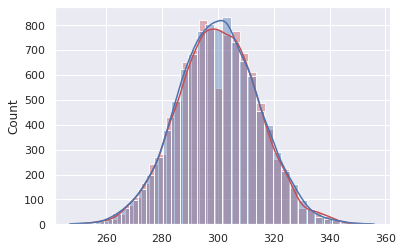

In [37]:
W = W_distribution(1000, 0.3, 10000)
B = np.random.binomial(n=1000, p=0.3, size=10000) #binomial distribution
sns.histplot(W, kde=True,bins=36, alpha = 0.4, color = "r")
sns.histplot(B, kde=True,bins=36, alpha = 0.4)

#### 6.B
State a formula for comuting $E(C)$.

Compute $E(C)$ for $p=0.1, 0.5, 0.8$ and $n=10, 20, 50, 100$

$$E(C)=\sum_{t}tP(C=t)$$  
$$t=\begin{pmatrix}
n\\
k
\end{pmatrix}$$  
$$P(W=k)=P(C=\begin{pmatrix}
n\\
k
\end{pmatrix})=\begin{pmatrix}
n\\
k
\end{pmatrix}(p^k(1-p)^{n-k})$$  
$$E(C)=\sum_{i=0}^{n}\begin{pmatrix}
n\\
i
\end{pmatrix}(p^i(1-p)^{n-i})$$  

In [38]:
def exp_C(n, p):
    x = 0
    for i in range(n+1):
        x = x + ((math.comb(n, i))**2)*((p**i)*(1-p)**(n-i))
    return x

In [39]:
D1 = []
D3 = []
for p in [0.1, 0.5, 0.8]:
    for n in [10, 20, 50, 100]:
        D1.append(exp_C(n, p))
        D3.append("p=" + str(p) + ",n=" + str(n))
        print("p=%g,"%p, "n=%g,"%n, "\t", "E(C)=%g;"%exp_C(n, p))

#For Q6.D
D = pd.DataFrame(D1, columns = ["C"])
D["label"] = D3
D["type"] = "E(C)"

p=0.1, n=10, 	 E(C)=22.576;
p=0.1, n=20, 	 E(C)=1757.75;
p=0.1, n=50, 	 E(C)=1.47931e+09;
p=0.1, n=100, 	 E(C)=1.68157e+19;
p=0.5, n=10, 	 E(C)=180.426;
p=0.5, n=20, 	 E(C)=131461;
p=0.5, n=50, 	 E(C)=8.96095e+13;
p=0.5, n=100, 	 E(C)=7.14302e+28;
p=0.8, n=10, 	 E(C)=66.95;
p=0.8, n=20, 	 E(C)=16979.4;
p=0.8, n=50, 	 E(C)=4.90152e+11;
p=0.8, n=100, 	 E(C)=2.01301e+24;


#### 6.C 
Plot the histograms of the values of $C$ for 1000 samples drawn from the space $(\Omega, P)$ for each combination of $p$ and $n$ from the previous section. <br>
Add text to each histogram with the empirical average of $C$ and the computed value of $E(C)$ (from the previous section). <br>
In every histogram indicate the values of $n$ and $p$. 

In [40]:
def C_distribution(n, p, n_exp):
    C = []
    for i in range(n_exp): #choose W first
        xw = ([0, 1])
        P = np.random.choice(xw, (n,), p=[1-p, p])
        W = math.comb(n, np.sum(P))
        C.append(W)
        X = np.array(C).astype(float)
    return X

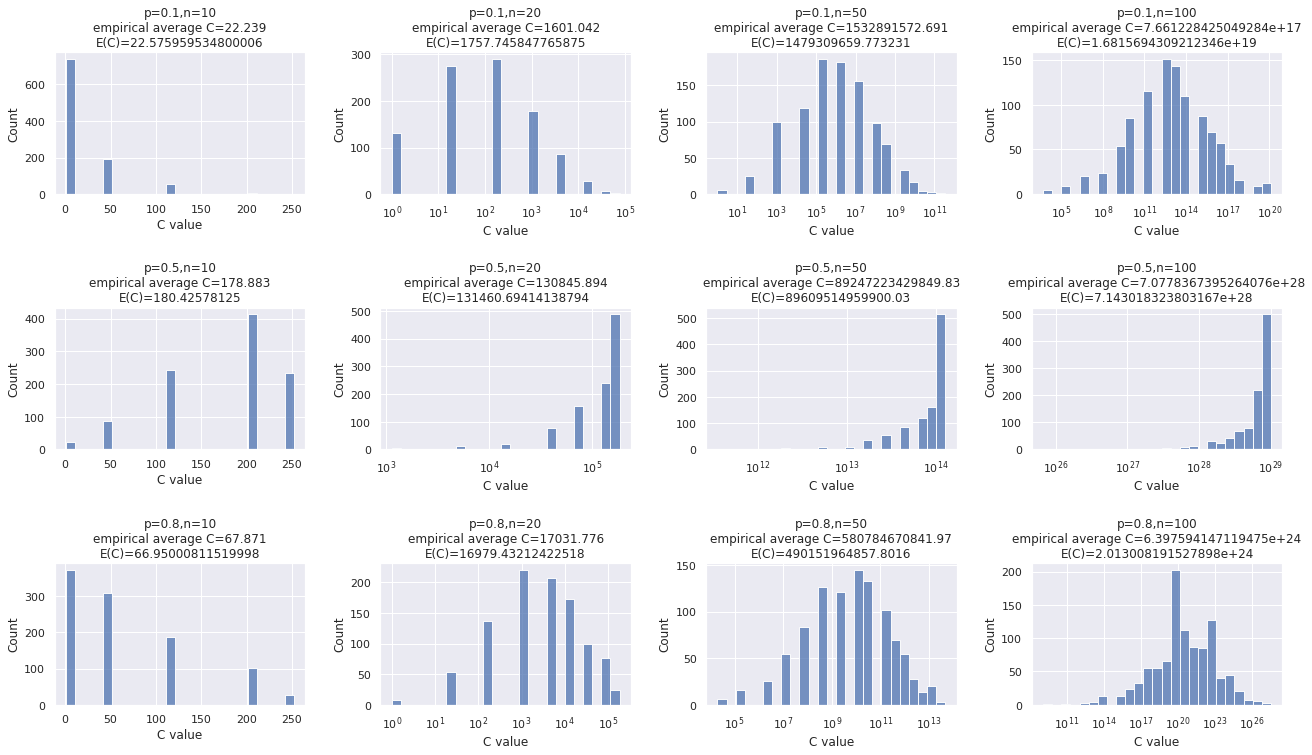

In [41]:
fig, ax = plt.subplots(3, 4, figsize=(22, 12))
fig.subplots_adjust(hspace = 0.8, wspace = 0.3)

D2 = []
x = 0
for p in [0.1, 0.5, 0.8]:
    y = 0
    for n in [10, 20, 50, 100]:
        C = C_distribution(n, p, 1000)
        if n >= 20:
            sub = sns.histplot(data = C, ax=ax[x,y], log_scale = True, bins=25)
        else:
            sub = sns.histplot(data = C, ax=ax[x,y], log_scale = False, bins=25)
        str_title = "p=" + str(p) + ",n=" + str(n) + "\n" + "empirical average C=" + str(C.mean()) + "\n" + "E(C)=" + str(exp_C(n, p))
        sub.set_title(str_title)
        sub.set_xlabel("C value")
        D2.append(C.mean())      
        y = y + 1
    x = x + 1

#### 6.D
Use a scatter plot to compare the empirical and the computed values from the previous section

In [42]:
DD = pd.DataFrame(D2, columns = ["C"])
DD["label"] = D3
DD["type"] = "empirical average"
result = pd.concat([D, DD])
result["C"] = result["C"].apply(np.log)

Text(0.5, 0, 'C value in log10')

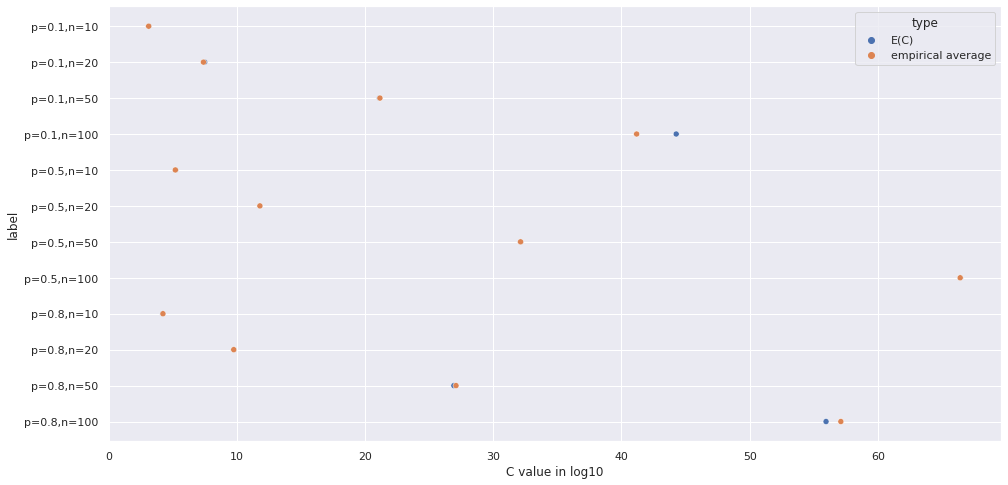

In [43]:
fig, ax = plt.subplots(figsize=(16, 8))
sca = sns.scatterplot(data = result, x = "C", y = "label", hue = "type")
sca.set_xlabel("C value in log10")